Análisis y Posibilidades con Machine Learning (ML) y Unsupervised Machine Learning (UML)

Objetivos Potenciales con Machine Learning:
Predicción de Precio: Usar las características de los vehículos para predecir el precio de venta. Modelos como regresión lineal, regresión de bosque aleatorio (random forest), o XGBoost pueden ser útiles.
Detección de Fraudes: Identificar patrones inusuales en los datos que puedan indicar posibles fraudes en las transacciones de vehículos usados.
Recomendación de Vehículos: Desarrollar un sistema de recomendación que sugiera vehículos a los compradores en función de sus preferencias y presupuesto.

Objetivos Potenciales con Unsupervised Machine Learning:
Clustering de Vehículos: Agrupar vehículos en categorías basadas en características similares. Algoritmos como K-means o DBSCAN pueden ayudar a identificar segmentos de mercado.
Análisis de Anomalías: Detectar vehículos con características atípicas que no se ajustan a los patrones comunes del conjunto de datos.
Reducción de Dimensionalidad: Utilizar técnicas como PCA (Análisis de Componentes Principales) para reducir la dimensionalidad de los datos y visualizar mejor las relaciones entre características.

Paso 1 Data

In [1]:
import pandas as pd

# Load the CSV file
file_path = 'train.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [2]:
# Load the CSV file again
file_path = 'train.csv'
data = pd.read_csv(file_path)

# Resumen estadístico del conjunto de datos
data.describe(include='all')


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,6019,6019,6019.000000,6.019000e+03,6019,6019,6019,6017,5983,5983,5977.000000,824,6019.000000
unique,1876,11,NaN,NaN,5,2,4,442,146,372,NaN,540,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,NaN,95.13 Lakh,NaN
freq,49,790,NaN,NaN,3205,4299,4929,172,606,235,NaN,6,NaN
mean,NaN,NaN,2013.358199,5.873838e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.278735,NaN,9.479468
std,NaN,NaN,3.269742,9.126884e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.808840,NaN,11.187917
min,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.440000
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,3.500000
50%,NaN,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,5.640000
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,9.950000


Paso 2 Limpieza

In [4]:
# Load the CSV file again
file_path = 'train.csv'
data = pd.read_csv(file_path)

# Información general del conjunto de datos
data_info = data.info()

# Resumen estadístico
data_description = data.describe(include='all')

# Detección de valores nulos
data_nulls = data.isnull().sum()

data_info, data_description, data_nulls


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


(None,
                           Name Location         Year  Kilometers_Driven  \
 count                     6019     6019  6019.000000       6.019000e+03   
 unique                    1876       11          NaN                NaN   
 top     Mahindra XUV500 W8 2WD   Mumbai          NaN                NaN   
 freq                        49      790          NaN                NaN   
 mean                       NaN      NaN  2013.358199       5.873838e+04   
 std                        NaN      NaN     3.269742       9.126884e+04   
 min                        NaN      NaN  1998.000000       1.710000e+02   
 25%                        NaN      NaN  2011.000000       3.400000e+04   
 50%                        NaN      NaN  2014.000000       5.300000e+04   
 75%                        NaN      NaN  2016.000000       7.300000e+04   
 max                        NaN      NaN  2019.000000       6.500000e+06   
 
        Fuel_Type Transmission Owner_Type    Mileage   Engine   Power  \
 count

In [5]:
# Rellenar los valores nulos con la mediana para columnas numéricas y modo para columnas categóricas
data['Mileage'] = data['Mileage'].fillna(data['Mileage'].mode()[0])
data['Engine'] = data['Engine'].fillna(data['Engine'].mode()[0])
data['Power'] = data['Power'].fillna(data['Power'].mode()[0])
data['Seats'] = data['Seats'].fillna(data['Seats'].median())

# Eliminar la columna 'New_Price' debido a la gran cantidad de valores nulos
data = data.drop(columns=['New_Price'])

# Convertir las columnas 'Mileage', 'Engine' y 'Power' a formato numérico
data['Mileage'] = data['Mileage'].str.extract('(\d+.\d+)').astype(float)
data['Engine'] = data['Engine'].str.extract('(\d+)').astype(int)
data['Power'] = data['Power'].str.extract('(\d+.\d+)').astype(float)

# Verificar la limpieza de datos
data.info(), data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   int32  
 9   Power              4915 non-null   float64
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(4), int32(1), int64(2), object(5)
memory usage: 540.9+ KB


<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Ro\AppData\Local\Temp\ipykernel_15044\2271315228.py:11: SyntaxWarning: invalid escape sequence '\d'
  data['Mileage'] = data['Mileage'].str.extract('(\d+.\d+)').astype(float)
C:\Users\Ro\AppData\Local\Temp\ipykernel_15044\2271315228.py:12: SyntaxWarning: invalid escape sequence '\d'
  data['Engine'] = data['Engine'].str.extract('(\d+)').astype(int)
C:\Users\Ro\AppData\Local\Temp\ipykernel_15044\2271315228.py:13: SyntaxWarning: invalid escape sequence '\d'
  data['Power'] = data['Power'].str.extract('(\d+.\d+)').astype(float)


(None,
               Year  Kilometers_Driven      Mileage       Engine        Power  \
 count  6019.000000       6.019000e+03  6019.000000  6019.000000  4915.000000   
 mean   2013.358199       5.873838e+04    18.134584  1618.738827   120.902323   
 std       3.269742       9.126884e+04     4.581574   600.445858    55.581823   
 min    1998.000000       1.710000e+02     0.000000    72.000000    34.200000   
 25%    2011.000000       3.400000e+04    15.170000  1197.000000    83.100000   
 50%    2014.000000       5.300000e+04    18.150000  1493.000000   103.600000   
 75%    2016.000000       7.300000e+04    21.100000  1969.000000   147.800000   
 max    2019.000000       6.500000e+06    33.540000  5998.000000   560.000000   
 
              Seats        Price  
 count  6019.000000  6019.000000  
 mean      5.276790     9.479468  
 std       0.806346    11.187917  
 min       0.000000     0.440000  
 25%       5.000000     3.500000  
 50%       5.000000     5.640000  
 75%       5.0000

Paso 3 Análisis Exploratorio de Datos 

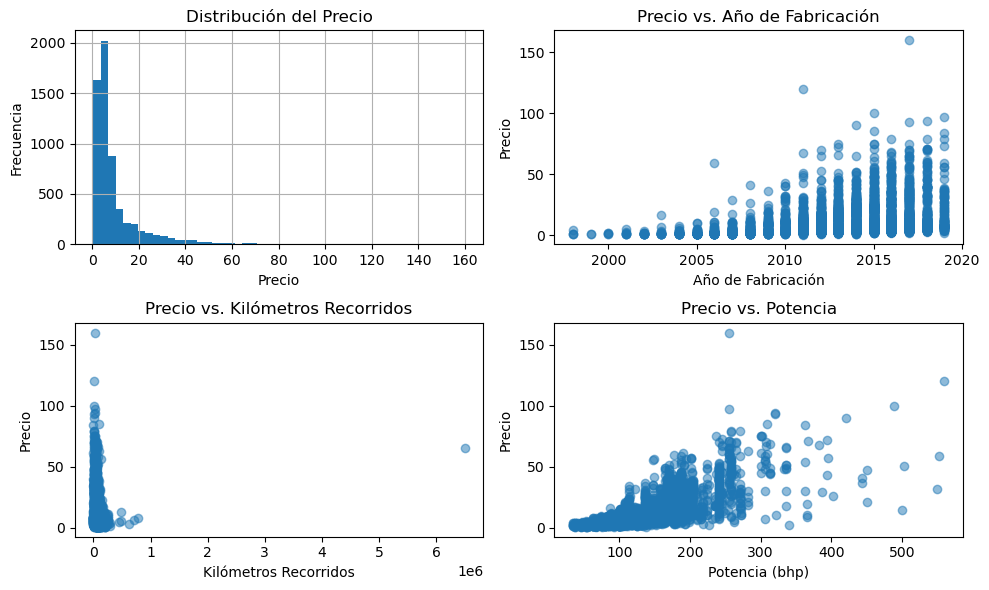

In [6]:
import matplotlib.pyplot as plt

# Configurar el tamaño de las figuras
plt.figure(figsize=(10, 6))

# Distribución del precio
plt.subplot(2, 2, 1)
data['Price'].hist(bins=50)
plt.title('Distribución del Precio')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

# Relación entre el precio y el año de fabricación
plt.subplot(2, 2, 2)
plt.scatter(data['Year'], data['Price'], alpha=0.5)
plt.title('Precio vs. Año de Fabricación')
plt.xlabel('Año de Fabricación')
plt.ylabel('Precio')

# Relación entre el precio y el kilometraje
plt.subplot(2, 2, 3)
plt.scatter(data['Kilometers_Driven'], data['Price'], alpha=0.5)
plt.title('Precio vs. Kilómetros Recorridos')
plt.xlabel('Kilómetros Recorridos')
plt.ylabel('Precio')

# Relación entre el precio y la potencia
plt.subplot(2, 2, 4)
plt.scatter(data['Power'], data['Price'], alpha=0.5)
plt.title('Precio vs. Potencia')
plt.xlabel('Potencia (bhp)')
plt.ylabel('Precio')

# Mostrar las gráficas
plt.tight_layout()
plt.show()


In [7]:
# Convertir variables categóricas a variables dummy
data = pd.get_dummies(data, columns=['Fuel_Type', 'Transmission', 'Owner_Type'], drop_first=True)

# Mostrar las primeras filas del conjunto de datos transformado
data.head()


,Name,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,26.60,998,58.16,5.0,1.75,False,False,False,False,True,False,False,False
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,19.67,1582,126.20,5.0,12.50,True,False,False,False,True,False,False,False
2,Honda Jazz V,Chennai,2011,46000,18.20,1199,88.70,5.0,4.50,False,False,False,True,True,False,False,False
3,Maruti Ertiga VDI,Chennai,2012,87000,20.77,1248,88.76,7.0,6.00,True,False,False,False,True,False,False,False
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,15.20,1968,140.80,5.0,17.74,True,False,False,False,False,False,True,False


Paso 5: División de Datos
Vamos a dividir el conjunto de datos en conjuntos de entrenamiento y prueba para evaluar los modelos de machine learning.

Paso 6: Entrenamiento de Modelos
Vamos a entrenar un modelo de regresión lineal para predecir el precio de los vehículo

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Seleccionar las características y la variable objetivo
X = data.drop(columns=['Name', 'Location', 'Price'])
y = data['Price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

mae, mse, rmse, r2


c:\Users\Ro\anaconda3\envs\dev\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(4.05131068595545, 63.10156819600544, 7.943649551434494, 0.48722713522372607)

Manejo de Valores Nulos
Voy a imputar los valores nulos restantes en la columna Power con la mediana de la columna.

In [8]:
# Imputar valores nulos en la columna 'Power' con la mediana
data['Power'] = data['Power'].fillna(data['Power'].median())

# Verificar si hay valores nulos
data.isnull().sum()

# Dividir los datos en conjuntos de entrenamiento y prueba de nuevo
X = data.drop(columns=['Name', 'Location', 'Price'])
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal de nuevo
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

mae, mse, rmse, r2


NameError: name 'train_test_split' is not defined

In [10]:
# Imputar valores nulos en la columna 'Power' con la mediana
data['Power'] = data['Power'].fillna(data['Power'].median())

# Verificar si hay valores nulos
data.isnull().sum()

# Dividir los datos en conjuntos de entrenamiento y prueba de nuevo
X = data.drop(columns=['Name', 'Location', 'Price'])
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal de nuevo
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

mae, mse, rmse, r2


c:\Users\Ro\anaconda3\envs\dev\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(4.05131068595545, 63.10156819600544, 7.943649551434494, 0.48722713522372607)